# Raspberry Pi Mouse sensor monitor

[raspimouse_http_controller](https://github.com/Tiryoh/raspimouse_http_controller)と組み合わせて使用するラズパイマウスのセンサ値連続受信用Jupyter Notebookです。

注がある場合を除き、本ページに掲載されているコードは[MIT](https://tiryoh.mit-license.org/)ライセンスに、文章は[CC BY 4.0](https://creativecommons.org/licenses/by/4.0/deed.ja)ライセンスに基づいて公開します。

実際に動いている様子は<a href="https://youtu.be/sBr1ngoACnU" target="_blank">YouTubeの動画</a>で確認できます。

## Requirements

Python 3を必要とします。

# step1
Pythonのモジュールをインポートします。
Jupyter Notebookでの描画に必要なモジュールと、ラズパイマウスとの通信に必要なモジュールと分かれています。

In [1]:
# 数値計算及び描画に必要なモジュール
import numpy as np
import math
from  matplotlib import pyplot as plt
from  matplotlib import patches as patches

# 通信用
import urllib.request
import time
import argparse
import json
import threading

# JupyterNotebook用モジュール
from IPython import display

# デバッグ用
from pprint import pprint

# step2

受信用のクラス(Receiver)を作成します。ラズパイマウスとTCP通信を行います。

In [2]:
class Receiver(object):
    def __init__(self, ip, port):
        print("init")
        self.url = "http://{}:{}".format(ip, port)
        print ("connecting to " + self.url)

    def get_sensor_val(self):
        start = time.time()
        request = urllib.request.Request(self.url)
        response = urllib.request.urlopen(request)
        sensor_dict = json.loads(response.read().decode('utf-8'))
        return sensor_dict

# step3

ラズパイマウスに接続します。
引数にはIPアドレスと使用するTCPポートを指定します。

In [3]:
# r = Receiver("192.168.64.3", 5000)
r = Receiver("192.168.22.5", 5000)

init
connecting to http://192.168.22.5:5000


# step4

試しにラズパイマウスからセンサの値を受信し、`print` してみます。

In [4]:
history = []
hoge = r.get_sensor_val()
history.append(hoge)
print(hoge)
print(history)

{'lightsensor': {'1': 40, '0': 278, '2': 14, '3': 223}, 'switch': {'1': False, '0': False, '2': False}}
[{'lightsensor': {'1': 40, '0': 278, '2': 14, '3': 223}, 'switch': {'1': False, '0': False, '2': False}}]


# step5

ラズパイマウスからセンサの値を連続受信し、`pprint` してみます。
`pprint` を用いることで `print` される内容が整形されます。

In [5]:
for i in range(10):
    hoge = r.get_sensor_val()
    history.append(hoge)
    time.sleep(0.1)

pprint(history)

[{'lightsensor': {'0': 278, '1': 40, '2': 14, '3': 223},
  'switch': {'0': False, '1': False, '2': False}},
 {'lightsensor': {'0': 144, '1': 35, '2': 13, '3': 194},
  'switch': {'0': False, '1': False, '2': False}},
 {'lightsensor': {'0': 18, '1': 7, '2': 110, '3': 156},
  'switch': {'0': False, '1': False, '2': False}},
 {'lightsensor': {'0': 13, '1': 10, '2': 390, '3': 328},
  'switch': {'0': False, '1': False, '2': False}},
 {'lightsensor': {'0': 19, '1': 5, '2': 474, '3': 264},
  'switch': {'0': False, '1': False, '2': False}},
 {'lightsensor': {'0': 11, '1': 4, '2': 412, '3': 195},
  'switch': {'0': False, '1': False, '2': False}},
 {'lightsensor': {'0': 14, '1': 6, '2': 910, '3': 401},
  'switch': {'0': False, '1': False, '2': False}},
 {'lightsensor': {'0': 14, '1': 5, '2': 1078, '3': 475},
  'switch': {'0': False, '1': False, '2': False}},
 {'lightsensor': {'0': 14, '1': 8, '2': 1181, '3': 589},
  'switch': {'0': False, '1': False, '2': False}},
 {'lightsensor': {'0': 18, '1': 

# step6

ラズパイマウスからセンサの値を連続受信し、受信するたびにグラフに描画します。  

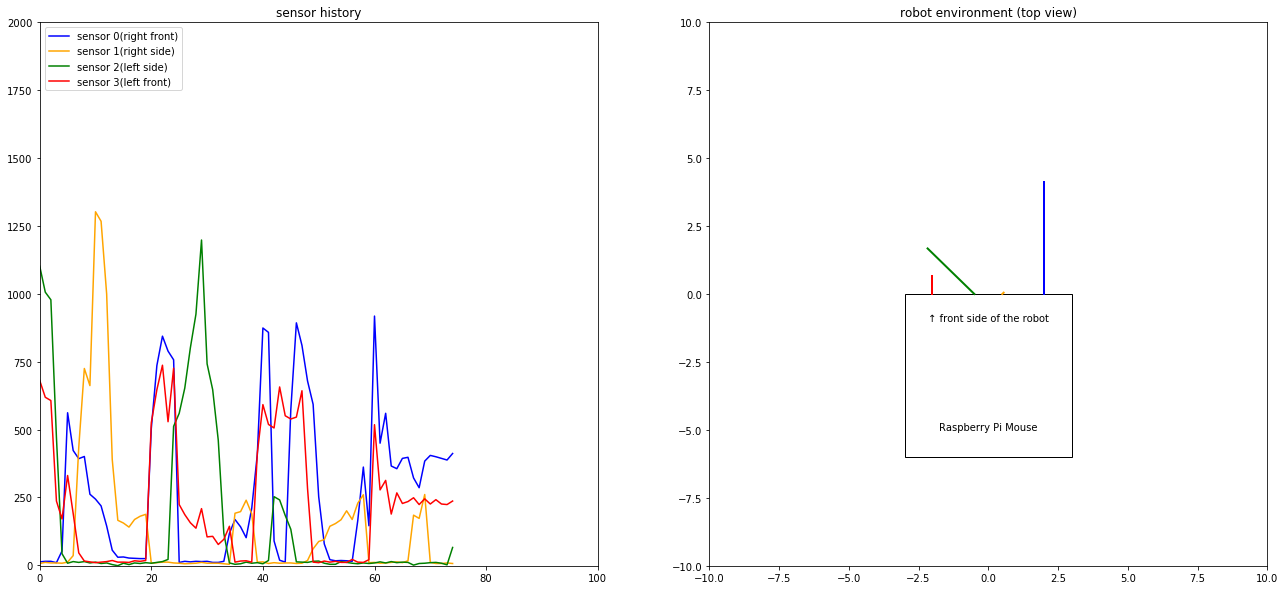

done.


In [6]:
history = []

for i in range(15):
    
    # リストが長くなったらリストを初期化
    if len(history) > 99:
        history = []
    
    # ラズパイマウスから情報取得
    for i in range(5):
        hoge = r.get_sensor_val()
        history.append(hoge)
        time.sleep(0.1)
    
    # タイトル付き新規ウィンドウ、座標軸を用意
    fig = plt.figure(figsize=(22, 10))
    
    # 左側の履歴表示
    graph = plt.subplot(1,2,1)
    graph.set_title("sensor history")
    graph.set_xlim(0,100)
    graph.set_ylim(-1.5,2000)
    
    # 右側の現在の状態表示
    view = plt.subplot(1,2,2)
    view.set_title("robot environment (top view)")
    view.set_xlim(-10,10)
    view.set_ylim(-10,10)

    # 描画用にセンサ値ごとのリストを用意
    x_arr = np.array([])
    y1_arr = np.array([])
    y2_arr = np.array([])
    y3_arr = np.array([])
    y0_arr = np.array([])

    # リストにセンサ値を代入
    for i in range(len(history)):
        x_arr = np.append(x_arr, i)
        y0_arr = np.append(y0_arr, history[i]["lightsensor"]["0"])
        y1_arr = np.append(y1_arr, history[i]["lightsensor"]["1"])
        y2_arr = np.append(y2_arr, history[i]["lightsensor"]["2"])
        y3_arr = np.append(y3_arr, history[i]["lightsensor"]["3"])

    # センサの履歴表示
    graph.plot(x_arr, y0_arr, label = "sensor 0(right front)", color = 'blue')
    graph.plot(x_arr, y1_arr, label = "sensor 1(right side)", color = 'orange')
    graph.plot(x_arr, y2_arr, label = "sensor 2(left side)", color = 'green')
    graph.plot(x_arr, y3_arr, label = "sensor 3(left front)", color = 'red')
    
    # ロボットの状態を表示
    rf_sensor_value = (history[len(history)-1]["lightsensor"]["0"])/100
    rf = plt.Line2D(xdata=(2.0, 2.0), ydata=(0.0, rf_sensor_value), color='blue', linewidth=2)
    rs_sensor_value = (history[len(history)-1]["lightsensor"]["1"])/100
    rs = plt.Line2D(xdata=(0.5, 0.5+rs_sensor_value*math.cos(np.deg2rad(45))), ydata=(0.0, rs_sensor_value*math.sin(np.deg2rad(45))), color='orange', linewidth=2)
    lf_sensor_value = (history[len(history)-1]["lightsensor"]["2"])/100
    lf = plt.Line2D(xdata=(-2.0, -2.0), ydata=(0.0, lf_sensor_value), color='red', linewidth=2)
    ls_sensor_value = (history[len(history)-1]["lightsensor"]["3"])/100
    ls = plt.Line2D(xdata=(-0.5, -0.5-ls_sensor_value*math.cos(np.deg2rad(45))), ydata=(0.0, ls_sensor_value*math.sin(np.deg2rad(45))), color='green', linewidth=2)
    robot = patches.Rectangle(xy=(-3, -6), width=6, height=6, ec='#000000', fill=False)
    view.add_line(rf)
    view.add_line(rs)
    view.add_line(lf)
    view.add_line(ls)
    view.add_patch(robot)
    view.text(0, -5 , "Raspberry Pi Mouse", horizontalalignment='center')
    view.text(0, -1 , "↑ front side of the robot", horizontalalignment='center')

    # 左上に凡例を追加
    graph.legend(loc='upper left')

    # 現在の状態を確認
    display.clear_output(wait=True)
    display.display(plt.gcf())
    #time.sleep(0.05)
    
print("done.")